<a href="https://colab.research.google.com/github/anand12yadav/Hyperparameter-Optimization-For-Xgboost/blob/master/Hyperparameter_Optimization_For_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Optimization For Xgboost using RandomSearchCV

**Implement K Fold Cross Validation and Stratified K Fold Cross Validation**

In [ ]:
import pandas as pd
df=pd.read_csv("churn_modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

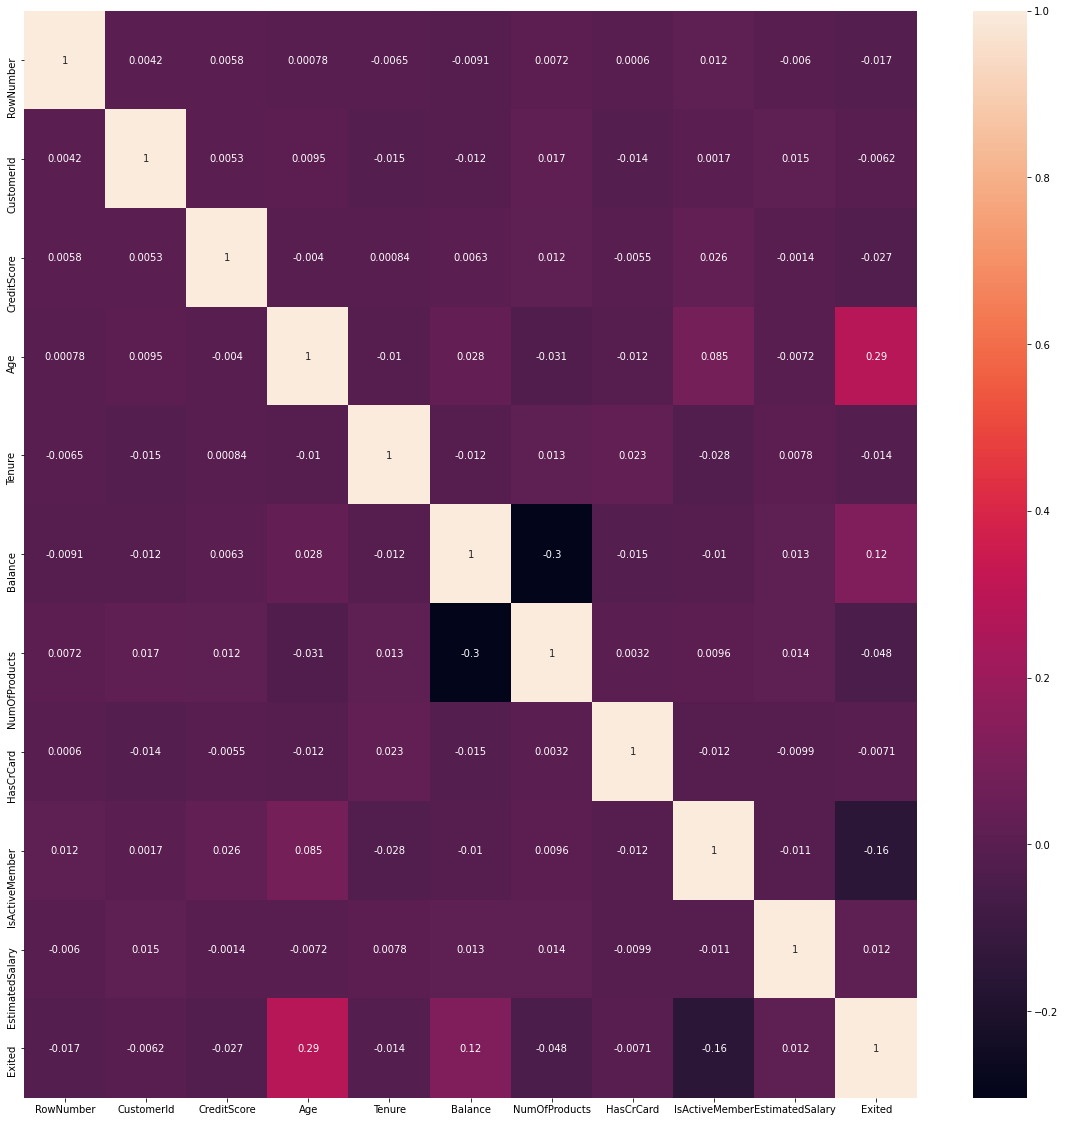

In [ ]:
# lets check correlation using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# getting correlation of each feature int the dataset
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [ ]:
# getting the independent and dependent features
# Taking all the rows in columns between 3 and 13 (independent data)
X=df.iloc[:,3:13]

# Taking all rows in column 13 (dependent data)
Y=df.iloc[:,13]


In [ ]:
# Getting Geography as it is categorical feature and performing one hot encoding through get_dummies
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [ ]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [ ]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Drop cateegorical features as we have new values thrugh one hot encoding
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
# concat the one hot encoded features 
X=pd.concat([X,geography,gender],axis=1)
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# Performing Hyper parameter Optimization for Xgboost 
# These all parameters and values are suitable for Xgboost

params={
    "learning_rate": [0.05,0.10,0.15,0.20,0.25,],
    "max_depth": [3,4,5,6,8,10,12,15],
    "min_child_weight": [1,3,5,7],
    "gamma": [0.0,0.1,0.2,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [ ]:
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
# Timer function to check hiw much time model takes to perform 
def timer(start_time=None):
  if not start_time:
    start_time=datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec=divmod(temp_sec,60)
    print("\n Time Taken : %i hours %i minutes and %s seconds." %(thour,tmin,round(tsec,2)))


In [ ]:
classifier =xgboost.XGBClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.869
[[2291   88]
 [ 305  316]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.78      0.51      0.62       621

    accuracy                           0.87      3000
   macro avg       0.83      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000



In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=1,cv=5,verbose=3)

In [ ]:
from datetime import datetime

# here we go 
start_time=timer(None)
random_search.fit(X,Y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, score=0.844, total=   1.3s
[CV] min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, score=0.858, total=   1.3s
[CV] min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, score=0.855, total=   1.3s
[CV] min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5 
[CV]  min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, score=0.855, total=   1.3s
[CV] min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5 
[CV]  min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, score=0.852, total=   1.3s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.25, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.25, gamma=0.4, colsample_bytree=0.7, score=0.869, total=   0.4s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.25, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.25, gamma=0.4, colsample_bytree=0.7, score=0.866, total=   0.4s
[CV] min_child_weight=3, max_depth=3, lea

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   17.9s finished



 Time Taken : 0 hours 0 minutes and 18.91 seconds.


In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.2,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 3}

In [ ]:
X.shape

(10000, 11)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.2,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 3}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=200)

In [ ]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [ ]:
prediction=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(prediction,y_test)
print(cm)
acc_score=accuracy_score(prediction,y_test)
print(acc_score)

[[2272  329]
 [  98  301]]
0.8576666666666667


# Cross Validation

**K Fold CV**

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

In [ ]:
score

array([0.88 , 0.866, 0.872, 0.873, 0.867, 0.857, 0.862, 0.881, 0.859,
       0.857])

In [ ]:

score.mean()

0.8674

**Stratified K fold Cross Validation**

This is also used when the dataset is imbalanced

In [ ]:
X.shape,Y.shape

((10000, 11), (10000,))

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf=StratifiedKFold(n_splits=10)

In [ ]:
skf.get_n_splits(X, Y)

10

In [ ]:
X.iloc[1965]

CreditScore           612.0
Age                    33.0
Tenure                  9.0
Balance                 0.0
NumOfProducts           1.0
HasCrCard               0.0
IsActiveMember          0.0
EstimatedSalary    142797.5
Germany                 0.0
Spain                   0.0
Male                    0.0
Name: 1965, dtype: float64

In [ ]:
skf.split(X,Y)

<generator object _BaseKFold.split at 0x7f34eef26b48>

In [ ]:
from sklearn.model_selection import StratifiedKFold

accuracy=[]

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X, Y)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,Y): 
    print("Train:", train_index, "Validation:", test_index) 
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index] 
    y1_train, y1_test = Y.iloc[train_index], Y.iloc[test_index]
    
    classifier.fit(X1_train,y1_train)
    prediction=classifier.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
    
print(accuracy)

Train: [1000 1001 1002 ... 9997 9998 9999] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

In [ ]:
import numpy as np
np.array(accuracy).mean()

0.8674